In [1]:
import aircv as ac
import os
import cv2
import matplotlib.pyplot as plt

In [91]:

path = r'D://111/'
pic1 = ac.imread(path+'1636345681120.JPEG')

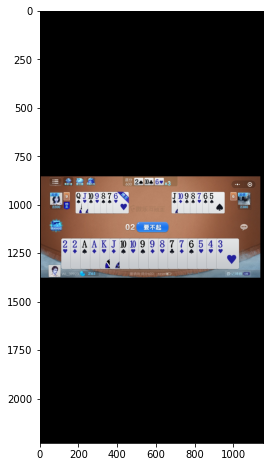

In [92]:

plt.figure(figsize=(4, 8))
plt.imshow(pic1)

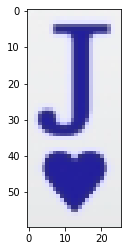

In [124]:
picq = pic1[935:995, 217:243]
plt.imshow(picq)

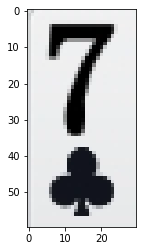

In [90]:
picj = pic1[935:995, 247:277]
plt.imshow(picj)

In [120]:
ls = ac.find_all_template(pic1, picq, 0.95, rgb=True, bgremove=True)

In [121]:
ls

[{'result': (787.0, 965.0),
  'rectangle': ((772, 935), (772, 995), (802, 935), (802, 995)),
  'confidence': 0.9713844060897827},
 {'result': (326.0, 965.0),
  'rectangle': ((311, 935), (311, 995), (341, 935), (341, 995)),
  'confidence': 0.9672681093215942}]

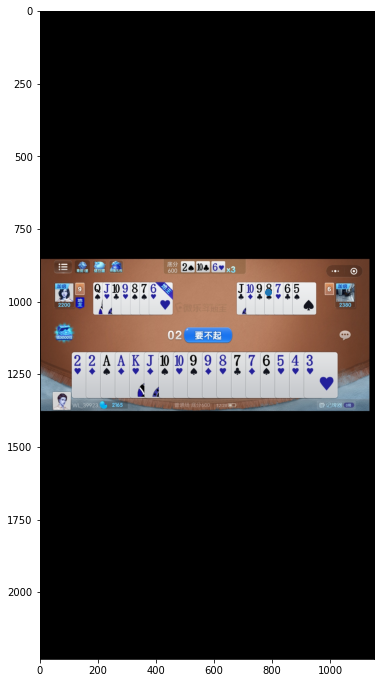

In [107]:
plt.figure(figsize=(6, 12))
plt.imshow(pic1)
for p in ls:
    p = p['result']
    plt.scatter(p[0], p[1])

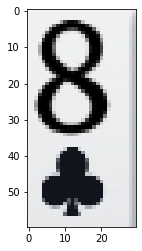

In [116]:
plt.imshow(pic1[935:995, 775:805])

In [126]:
cv2.imwrite('E:/LuneZ99/aircv/HJ.png', picq)

True

In [ ]:
{
    'prev': ['CJ', 'DT', 'C9', 'C8', 'H7', 'C6', 'S5'],
    'self': [],
    'next': ['SQ', 'HJ', 'CT', 'H9', 'S8', 'S7', 'H6'],
    'landlord': ['S2', 'CT', 'H6']
}

